In [9]:
#Importing libraries:
import pandas as pd #to modify dataframes
import numpy as np #for faster numerical calculations
import matplotlib.pyplot as plt #for plotting 
import seaborn as sns #also for plotting
from sklearn.model_selection import train_test_split #for splitting data into train and validation
from sklearn.preprocessing import StandardScaler #to standardize numerical variables 
import datetime as dt #to convert a column into datetime type
from scipy import stats #for few statistical problems
from scipy.stats import norm, skew #to check or plot normal and skewed distributions
import os
from scipy import stats as st #for few statistical problems
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [10]:
data=pd.read_csv("IRIS.csv")
print(data)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]


In [11]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
data.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.054000,3.758667,1.198667,NaN
std,0.828066,0.433594,1.764420,0.763161,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [14]:
data.duplicated().sum()

3

In [12]:
data[data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [28]:
#data.loc[data.duplicated(keep="first"),:]

In [13]:
new_data=data.drop_duplicates(keep='last')
new_data.iloc[34,:]

sepal_length            5.5
sepal_width             3.5
petal_length            1.3
petal_width             0.2
species         Iris-setosa
Name: 36, dtype: object

In [14]:
new_data.duplicated().sum()

0

In [15]:
new_data.isnull().sum(axis=0) #missing Data

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<AxesSubplot:>

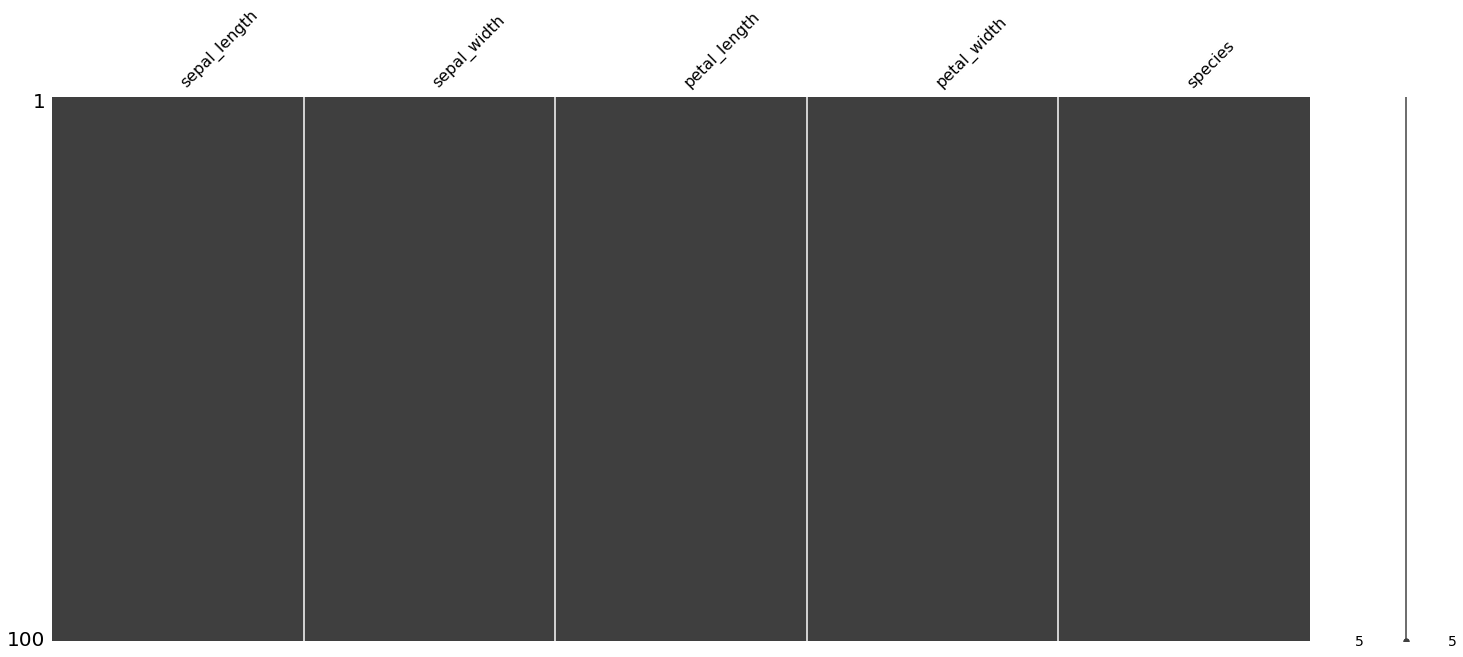

In [19]:
msno.matrix(new_data.sample(100)) 

In [20]:
new_data.skew()

sepal_length    0.292560
sepal_width     0.324351
petal_length   -0.293763
petal_width    -0.113479
dtype: float64

In [22]:
new_data.kurt()

sepal_length   -0.556956
sepal_width     0.246838
petal_length   -1.374462
petal_width    -1.317760
dtype: float64

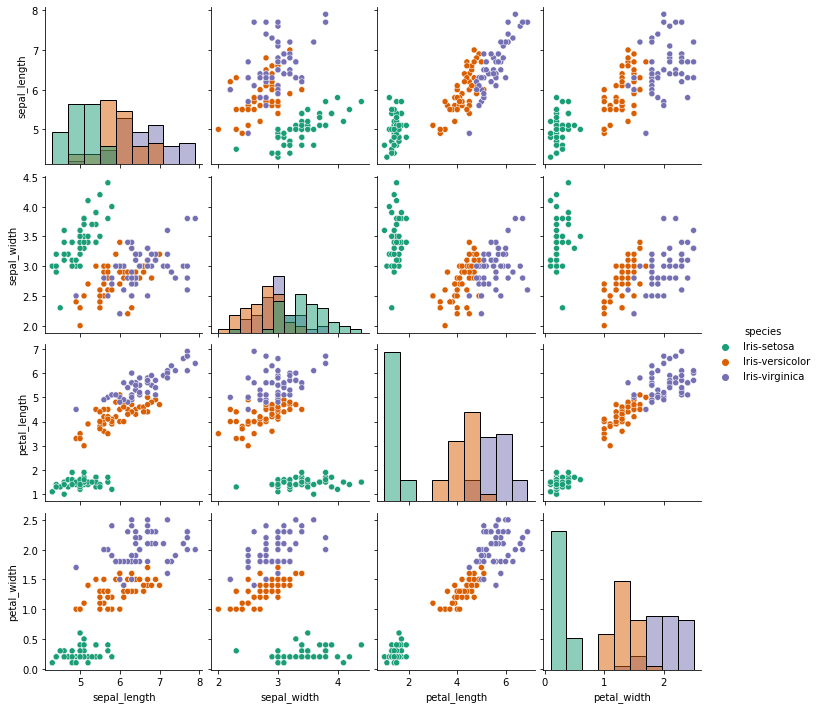

In [23]:
sns.pairplot(data=new_data, hue='species', diag_kind='hist', palette='Dark2')